<a href="https://colab.research.google.com/github/timidsurgeon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Christian_Lopez_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
cancer_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [77]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [78]:
df = pd.read_csv(cancer_data_url)
print(df.shape)
df.head()

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [79]:
df.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [80]:
df = pd.read_csv(cancer_data_url, header=None)
print(df.shape)
df.head()

(306, 4)


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [81]:
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
0    306 non-null int64
1    306 non-null int64
2    306 non-null int64
3    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [83]:
col_headers = ['age_patient', 'year_op', 'ax_nodes', 'survived']
df = pd.read_csv(cancer_data_url, header=None, names=col_headers)
df.head(20)

,age_patient,year_op,ax_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [84]:
print(df.head(5))

   age_patient  year_op  ax_nodes  survived
0           30       64         1         1
1           30       62         3         1
2           30       65         0         1
3           31       59         2         1
4           31       65         4         1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [85]:
pd.crosstab(df['age_patient'], df['ax_nodes'])

ax_nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
age_patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,2,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,3,2,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
39,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


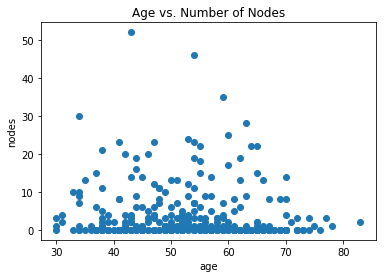

In [93]:
plt.scatter(df.age_patient, df.ax_nodes)
plt.xlabel('age')
plt.ylabel('nodes')
plt.title('Age vs. Number of Nodes')
plt.show()

In [117]:
pd.crosstab(df['age_patient'], df['year_op'])

year_op,58,59,60,61,62,63,64,65,66,67,68,69
age_patient,,,,,,,,,,,,
30,0,0,0,0,1,0,1,1,0,0,0,0
31,0,1,0,0,0,0,0,1,0,0,0,0
33,1,0,1,0,0,0,0,0,0,0,0,0
34,1,1,2,1,0,0,0,0,1,1,0,0
35,0,0,0,0,0,1,1,0,0,0,0,0
36,0,0,1,0,0,0,0,0,0,0,0,1
37,1,1,2,0,0,2,0,0,0,0,0,0
38,0,1,3,0,1,0,1,0,2,1,0,1
39,1,1,0,0,0,2,0,0,1,1,0,0


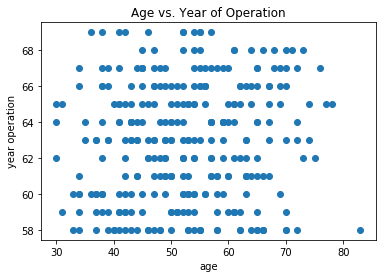

In [118]:
plt.scatter(df.age_patient, df.year_op)
plt.xlabel('age')
plt.ylabel('year operation')
plt.title('Age vs. Year of Operation')
plt.show()

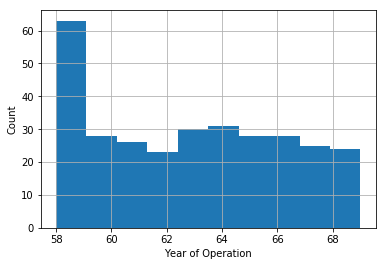

In [124]:
df.year_op.hist();
plt.xlabel('Year of Operation')
plt.ylabel('Count')
plt.show()

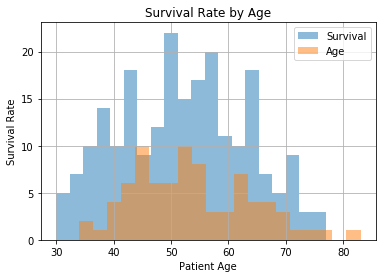

In [109]:
df.groupby('survived').age_patient.hist(bins=20, alpha=0.5)
plt.title('Survival Rate by Age')
plt.ylabel('Survival Rate')
plt.xlabel('Patient Age')
plt.legend(['Survival', 'Age'])
plt.show()

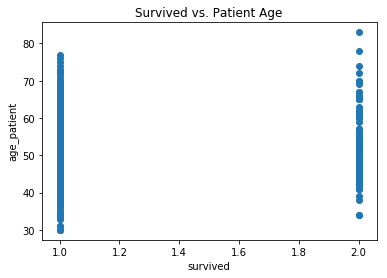

In [126]:
plt.scatter(df.survived, df.age_patient)
plt.xlabel('survived')
plt.ylabel('age_patient')
plt.title('Survived vs. Patient Age')
plt.show()

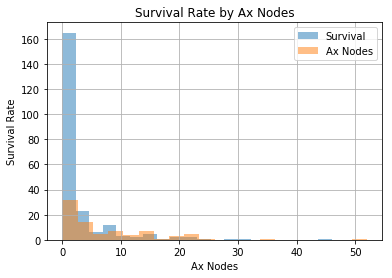

In [111]:
df.groupby('survived').ax_nodes.hist(bins=20, alpha=0.5)
plt.title('Survival Rate by Ax Nodes')
plt.ylabel('Survival Rate')
plt.xlabel('Ax Nodes')
plt.legend(['Survival', 'Ax Nodes'])
plt.show()

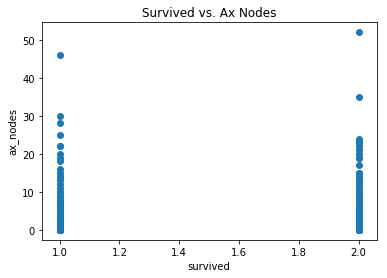

In [128]:
plt.scatter(df.survived, df.ax_nodes)
plt.xlabel('survived')
plt.ylabel('ax_nodes')
plt.title('Survived vs. Ax Nodes')
plt.show()

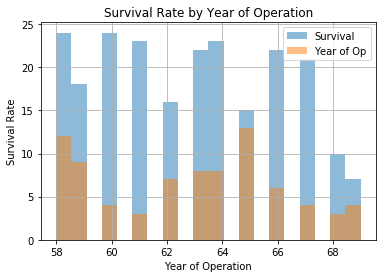

In [120]:
df.groupby('survived').year_op.hist(bins=20, alpha=0.5)
plt.title('Survival Rate by Year of Operation')
plt.ylabel('Survival Rate')
plt.xlabel('Year of Operation')
plt.legend(['Survival', 'Year of Op'])
plt.show()

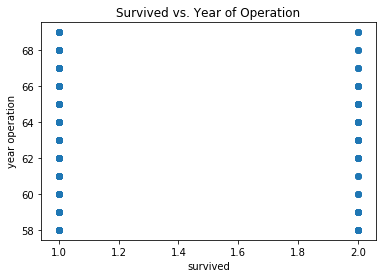

In [132]:
plt.scatter(df.survived,df.year_op)
plt.xlabel('survived')
plt.ylabel('year operation')
plt.title('Survived vs. Year of Operation')
plt.show()

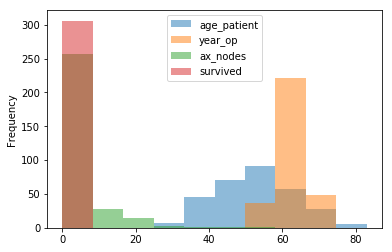

In [87]:
df.plot.hist(alpha=0.5);

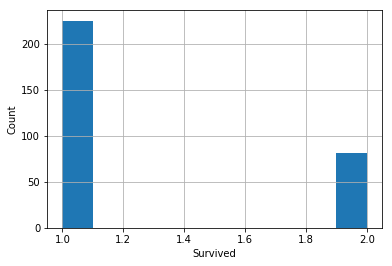

In [122]:
df.survived.hist();
plt.ylabel('Count')
plt.xlabel('Survived')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

One feature that looks to have a positive relationship with survival is the patient's age with the the number of positive nodes. As the number of ax nodes goes up, the survival rate goes down. 
- What is at least one feature that looks to have a negative relationship with survival?

One feature that appears to have a negative relationship with survival is year of operation. 

- How are those two features related with each other, and what might that mean?

Those features are related to each other because what can be derived from this is that not many advancements were made in medicine during the time frame to better detect those ax nodes. But, it shows that if we are better able to detect them and less of them are present in the individual, then the rate of survival is dramatically increased.